In [3]:
import netCDF4 as nc
import h5py
import xarray as xr

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.utils.data import Dataset, IterableDataset
import torch.nn.functional as F
from torch.utils.data import DataLoader

import os
from pathlib import Path
import re
from datetime import datetime
import sys

# 导入模块
from ST import STDataset


def plot_ocean_data(data, i):
    """
    绘制第i个时刻的海洋数据

    参数:
    - data: 海洋数据的三维数组，形状为(112, 120, 280)
    - i: 要绘制的时刻的索引（从0开始）
    
    返回:
    - 绘制的数据图像。
    """
    time_data = data[i, :, :]
    
    plt.figure(figsize=(10, 6))
    
    plt.imshow(time_data, cmap='viridis', origin='lower', aspect='auto')
    plt.colorbar(label='Data Value')

    plt.xlabel('Longitude Index')
    plt.ylabel('Latitude Index')
    plt.title(f'Ocean Data at Time Index {i}')

    plt.show()



def plot_multiple_ocean_data(data, indices):
    """
    绘制多个时刻的海洋数据子图。

    参数:
    - data: 海洋数据的三维数组，形状为(112, 120, 280)
    - indices: 要绘制的时刻索引列表（从0开始）

    返回:
    - 绘制的多个子图。
    """
    num_plots = len(indices)
    cols = min(num_plots, 3)  # 每行最多绘制3个子图
    rows = (num_plots + cols - 1) // cols  # 计算总行数

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), constrained_layout=True)
    axes = axes.flatten()  # 将子图数组展平，方便索引

    for idx, time_idx in enumerate(indices):
        time_data = data[time_idx, :, :]
        ax = axes[idx]
        im = ax.imshow(time_data, cmap='viridis', origin='lower', aspect='auto')
        ax.set_title(f'Time Index {time_idx}')
        ax.set_xlabel('Longitude Index')
        ax.set_ylabel('Latitude Index')
        plt.colorbar(im, ax=ax, shrink=0.8)

    # 如果子图数量小于网格中的子图数量，隐藏多余的子图
    for idx in range(num_plots, len(axes)):
        axes[idx].axis('off')

    plt.show()

## 读取归一化后的数据

In [5]:
train_dataset = STDataset(
                region_name = 'Gulf',
                folder_path= '/home/data2/pengguohang/My_Ocean/challenge/1993_2019_data/',
                task = 'S',
                if_train=True,
                seq_len=0
                )

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

Shape of variables: torch.Size([288, 10, 54, 100]) torch.Size([288, 15, 54, 100]) torch.Size([54]) torch.Size([100]) torch.Size([15])


In [7]:
for inputs, targets, mask in train_loader:
    print(inputs.shape, targets.shape, mask.shape)
    break

torch.Size([2, 10, 54, 100]) torch.Size([2, 15, 54, 100]) torch.Size([2, 54, 100])


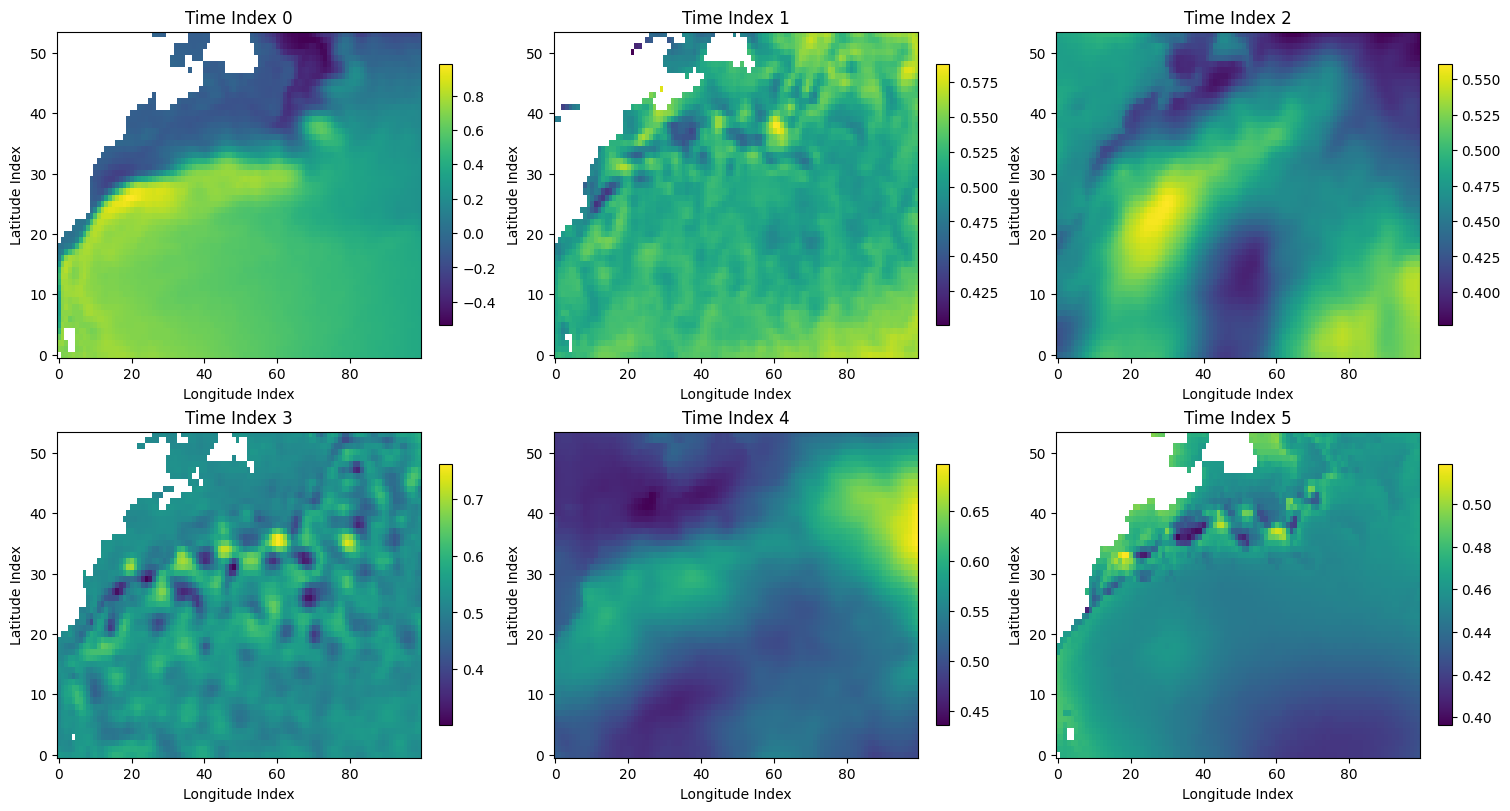

In [ ]:
# input
plot_multiple_ocean_data(inputs[0], [0,1,2,3,4,5])

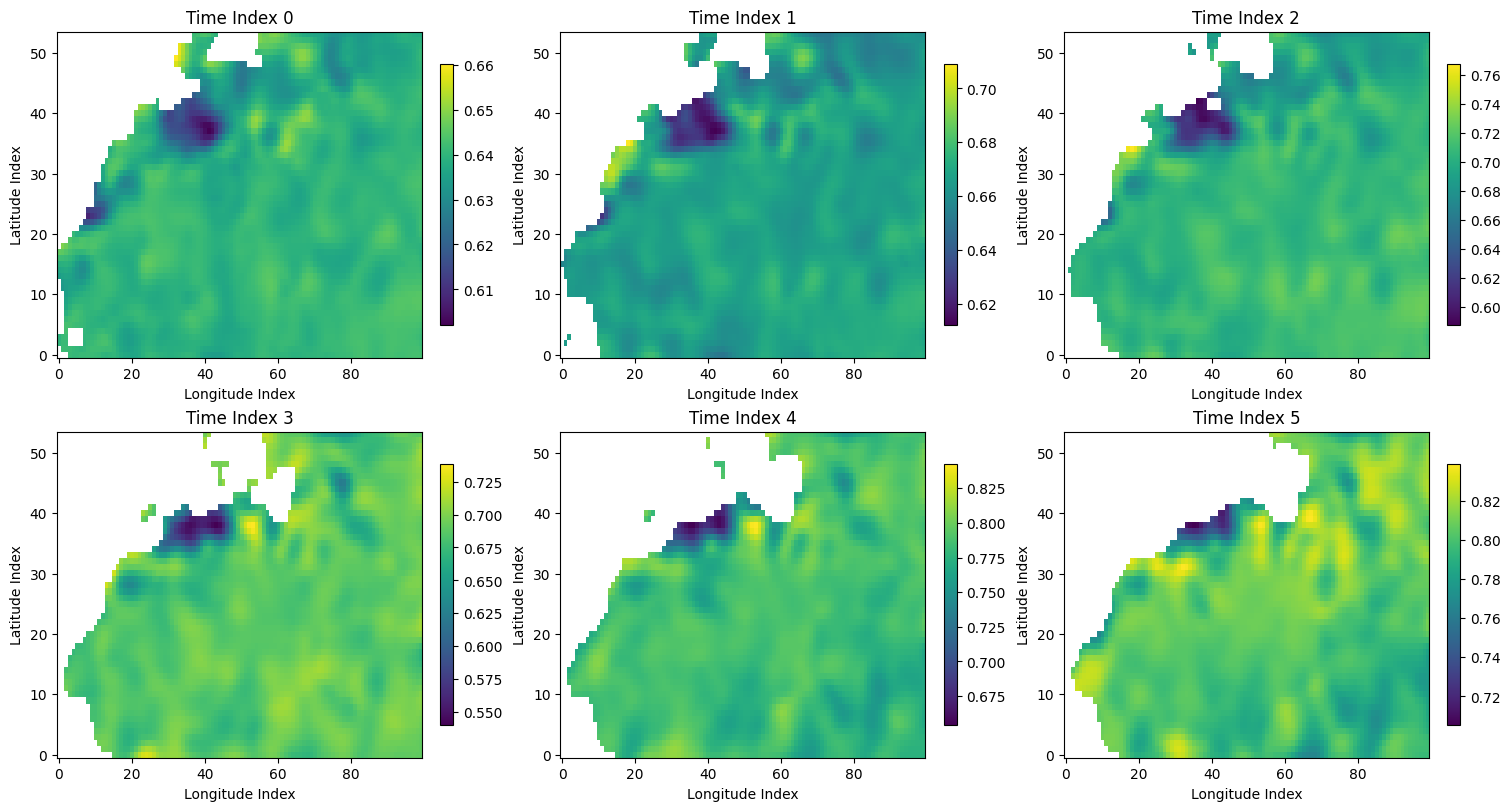

In [ ]:
# label
plot_multiple_ocean_data(targets[0], [0,1,2,3,4,5])

In [ ]:
# 逆归一化

min_label, max_label = minmax

min_label = min_label.view(1, y.shape[1], 1).expand_as(y).to(y.device)
max_label = max_label.view(1, y.shape[1], 1).expand_as(y).to(y.device)

pred = pred * (max_label-min_label) + min_label
y = y * (max_label-min_label) + min_label

## 读取原始label